In [32]:
# Importing essential libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [33]:
# Loading the dataset
df = pd.read_csv('/content/drive/MyDrive/Artificial Neural Network /Churn_Modelling.csv')

**Exploring the dataset**

In [34]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
# Importing essential libraries for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

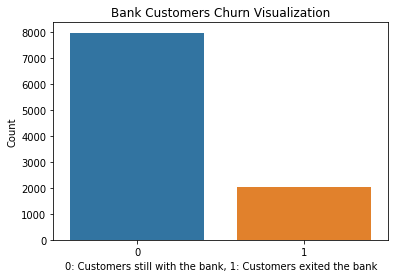

In [8]:
# Visualizing the count of 'exited customers' in the dataset

sns.countplot(x='Exited', data=df)
plt.xlabel('0: Customers still with the bank, 1: Customers exited the bank')
plt.ylabel('Count')
plt.title('Bank Customers Churn Visualization')
plt.show()

In [9]:
df.isna().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [10]:
df.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

**Feature Engineering**

In [11]:
# Converting 'Geography' and 'Gender' column
df = pd.get_dummies(df, drop_first=True)

In [12]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [13]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [14]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (8000, 11), X_test size: (2000, 11)


**Feature Scaling**

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Building Artificial Neural Network (ANN)**

In [16]:
# Now let's make the ANN!

# Importing the Keras libraries and packages
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [17]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 10,kernel_initializer='he_uniform',activation='relu',input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(units = 10, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [18]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10,epochs = 100)

Epoch 1/100
536/536 [==============================] - 6s 4ms/step - loss: 0.5375 - accuracy: 0.7449 - val_loss: 0.4606 - val_accuracy: 0.8005
Epoch 2/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4414 - accuracy: 0.8115 - val_loss: 0.4397 - val_accuracy: 0.8046
Epoch 3/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4242 - accuracy: 0.8203 - val_loss: 0.4307 - val_accuracy: 0.8076
Epoch 4/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4113 - accuracy: 0.8272 - val_loss: 0.4210 - val_accuracy: 0.8095
Epoch 5/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3996 - accuracy: 0.8322 - val_loss: 0.4099 - val_accuracy: 0.8236
Epoch 6/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3875 - accuracy: 0.8433 - val_loss: 0.4001 - val_accuracy: 0.8270
Epoch 7/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3762 - accuracy: 0.8444 - val_loss: 0.3890 - val_accuracy: 0.8345

In [ ]:
model_history.history.keys()

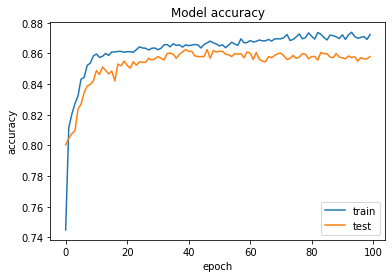

In [35]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

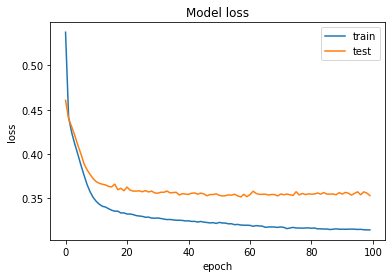

In [36]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

**Model Evaluation**

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
y_pred

In [ ]:
y_pred = (y_pred > 0.5)
y_pred

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

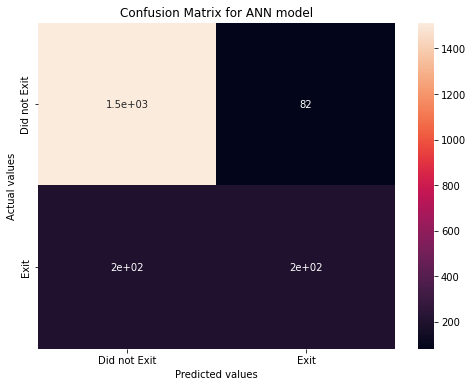

In [37]:
# Plotting confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, xticklabels=['Did not Exit', 'Exit'], yticklabels=['Did not Exit', 'Exit'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for ANN model')
plt.show()

In [38]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
print('The accuracy for ANN model is: {}%'.format(score*100))

The accuracy for ANN model is: 85.75%


**Predictions**

In [ ]:
def predict_exit(sample_value):
  
  # Convert list to numpy array
  sample_value = np.array(sample_value)

  # Reshape because sample_value contains only 1 record
  sample_value = sample_value.reshape(1, -1)

  # Feature Scaling
  sample_value = sc.transform(sample_value)

  return classifier.predict(sample_value)

In [39]:
# Predictions
# Value order 'CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Germany','Spain','Male'.
sample_value = [738, 62, 10, 83008.31, 1, 1, 1, 42766.03, 1, 0, 1]
if predict_exit(sample_value)>0.5:
  print('Prediction: High chances of exit!')
else:
  print('Prediction: Low chances of exit.')

Prediction: Low chances of exit.


In [40]:
# Predictions
# Value order 'CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Germany','Spain','Male'.
sample_value = [805, 45, 9, 116585.97, 1, 1, 0, 189428.75, 1, 0, 0]
if predict_exit(sample_value)>0.5:
  print('Prediction: High chances of exit!')
else:
  print('Prediction: Low chances of exit.')

Prediction: High chances of exit!
